In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division

In [29]:
def sample(N):
    X = np.ones((N, 3))  # first dimension is bias
    X[:int(N/2), 1:] = np.random.multivariate_normal([0, 1], 2 * np.identity(2), int(N / 2))
    X[int(N/2):, 1:] = np.random.multivariate_normal([1, 0], 2 * np.identity(2), int(N / 2))
    y = np.zeros(N)
    y[:int(N/2)] = 1
    y[int(N/2):] = -1
    return X, y

In [30]:
X, y = sample(1000)
X.shape, y.shape

((1000L, 3L), (1000L,))

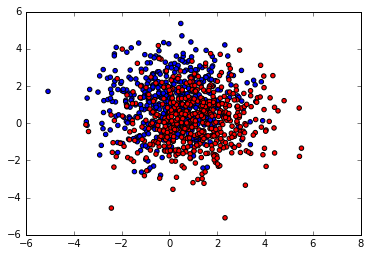

In [31]:
plt.scatter(X[:, 1], X[:, 2], c=['r' if ys == -1 else 'b' for ys in y])

In [32]:
X_test, y_test = sample(1000)

all_w1 = []
all_w2 = []
all_b = []
all_acc_train = []
all_acc_test = []

Ns = [2, 4, 6, 8, 10, 20, 40, 100]

for N in Ns:
    all_w1.append([])
    all_w2.append([])
    all_b.append([])
    all_acc_train.append([])
    all_acc_test.append([])
    for step in range(50):
        X_train, y_train = sample(N)
        
        w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train.reshape(-1, 1))
        y_train_pred = np.sign(w.T.dot(X_train.T)).flatten()
        y_test_pred = np.sign(w.T.dot(X_test.T)).flatten()
        
        acc_train = np.mean(y_train == y_train_pred)
        acc_test = np.mean(y_test == y_test_pred)
        
        all_w1[-1].append(w[1, 0])
        all_w2[-1].append(w[2, 0])
        all_b[-1].append(w[0, 0])
        all_acc_train[-1].append(acc_train)
        all_acc_test[-1].append(acc_test)

#### a)

(0, 1.1)

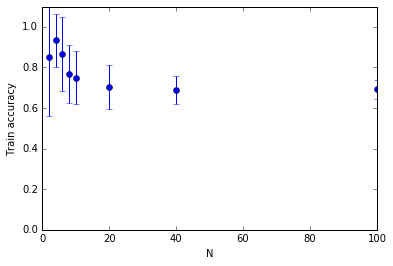

In [33]:
plt.errorbar(Ns, np.mean(all_acc_train, axis=1), yerr=np.std(all_acc_train, axis=1), fmt='o')
plt.xlabel('N')
plt.ylabel('Train accuracy')
plt.ylim(0, 1.1)

(0, 1.1)

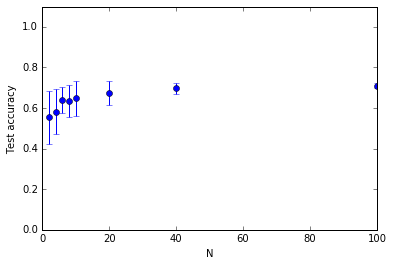

In [34]:
plt.errorbar(Ns, np.mean(all_acc_test, axis=1), yerr=np.std(all_acc_test, axis=1), fmt='o')
plt.xlabel('N')
plt.ylabel('Test accuracy')
plt.ylim(0, 1.1)

#### b)

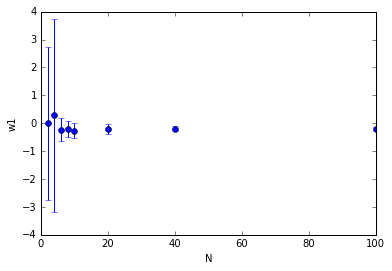

In [35]:
plt.errorbar(Ns, np.mean(all_w1, axis=1), yerr=np.std(all_w1, axis=1), fmt='o')
plt.xlabel('N')
plt.ylabel('w1')

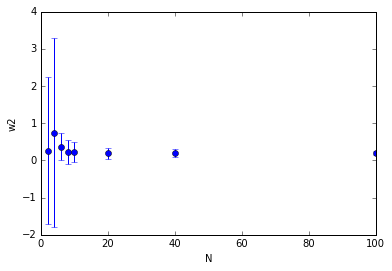

In [36]:
plt.errorbar(Ns, np.mean(all_w2, axis=1), yerr=np.std(all_w2, axis=1), fmt='o')
plt.xlabel('N')
plt.ylabel('w2')

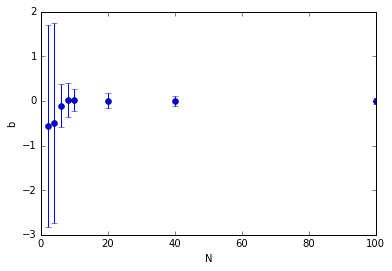

In [37]:
plt.errorbar(Ns, np.mean(all_b, axis=1), yerr=np.std(all_b, axis=1), fmt='o')
plt.xlabel('N')
plt.ylabel('b')

#### c)

For larger N, the train accuracy stays approximately the same and the test accuracy increases. This shows that the model generalizes better with a larger training set (less overfitting). Also, the standard deviation of all values (especially the model parameters) decreases, which shows that the model is settling to a steady state with more training data.